# Андан на экономе: домашнее задание 2




# Часть 1: рисковая

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_prices = pd.read_csv('price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [3]:
df_inf = pd.read_csv('information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False



## 1.1 Разогреваемся

**а) [0 баллов]** В колонке Date лежит день, когда торговалась бумага. Сейчас у неё тип string. Превратите её в datetime и сделайте индексом таблицы.


In [4]:
df_prices['Date']= pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date')
df_prices.Date.dtype

dtype('<M8[ns]')

**б) [5 баллов]** В колонках 'S&P-500', 'NASDAQ', 'DJI' лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ?

In [5]:
len(df_inf[df_inf['NASDAQ'] == True])

103

Сколько ценных бумаг входят во все три индекса сразу?

In [6]:
len(df_inf[(df_inf['NASDAQ'] == True ) & (df_inf['S&P-500'] == True) & (df_inf['DJI'] == True)])

5

В колонке Founded записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)?

In [7]:
len(df_inf[(df_inf['S&P-500'] == True ) & (df_inf['Founded'] <=1899.0) & (df_inf['Founded'] >= 1801.0)])

95

В колонке GICS Sector находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [8]:
df_inf.drop_duplicates(subset=['GICS Sector']).shape[0]

12

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров?

In [9]:
prices_tickers = list(df_prices.columns.values)
info_tickers = list(df_inf['Symbol'])
unique_tickers = set(prices_tickers) - set(info_tickers)
count_unique_tickers = len(unique_tickers)
print(count_unique_tickers-1)

58


**в) [5 баллов]** Сколько компаний из индекса S&P-500 в сумме приходится на 3 самых крупных сектора?

In [10]:
len(df_inf[(df_inf['S&P-500'] == True ) & (df_inf['GICS Sector'] == 'Health Care') | (df_inf['GICS Sector'] == 'Energy') |
           (df_inf['GICS Sector'] == 'Information Technology')])

159

**г) [5 баллов]** Теперь поработаем со стоимостью акций.

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

    Распределение стоимости акций похоже на нормальное?
    Что происходило с финансовыми рынками в течение последних 10лет? 
    Они росли? Они падали? Видно ли, что были кризисы?

Ответ: в течении последних 10 лет на финансовом рынке 4 из 5 выбранных акций изменяются в одном и том же диапазоне и не имеют каких-либо резких изменений в стоимости. Только MOH начиная с 2019 года имеет тенденцию на резкое увеличение стоимости, достигая пика в цене равному 350 в 2023 году, однако после этого опять идёт на спад

Распределение стоимостей акций вообще не похоже на нормальное

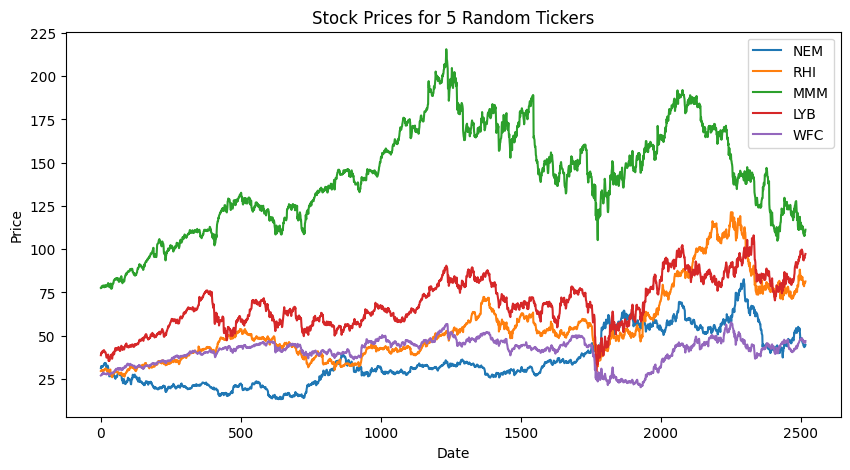

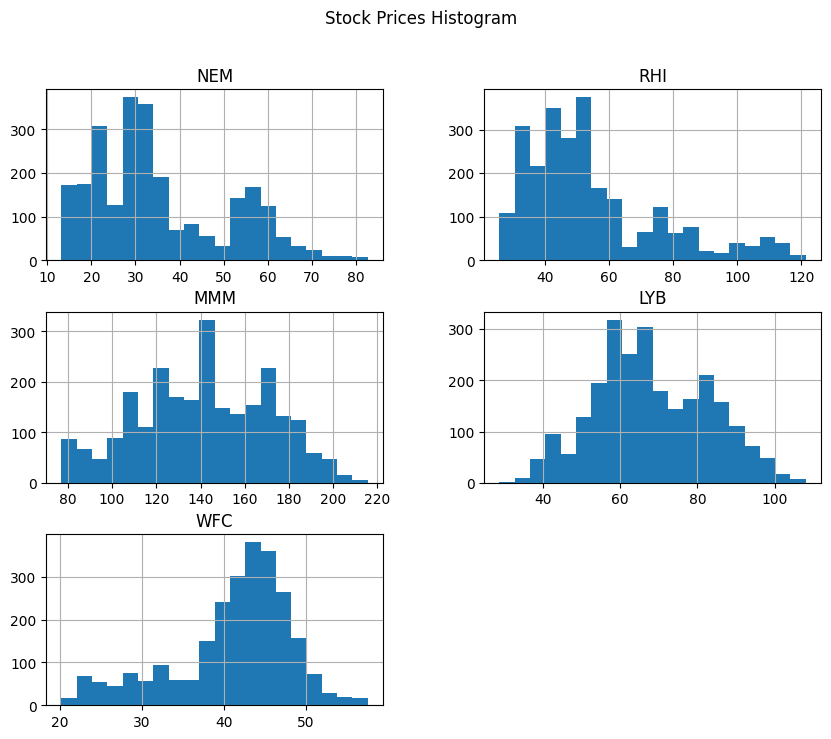

In [11]:
tickers = df_prices.columns[1:] 
random_tickers = tickers.to_frame().sample(5).index

tickers_df = df_prices.loc[:, random_tickers]

tickers_df.plot(title='Stock Prices for 5 Random Tickers', xlabel='Date', ylabel='Price', figsize=(10, 5))

hist = tickers_df.hist(bins=20, figsize=(10, 8))

plt.suptitle('Stock Prices Histogram')

plt.show()

**д) [5 баллов]** Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте left join таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора 95%
квантиль медианной цены.

In [12]:
last_year_prices = df_prices.loc['2022-03-30':'2023-03-30']
median_prices = last_year_prices.median(numeric_only=True)
median_prices.name = "Median prices"
merged = pd.merge(median_prices, df_inf, left_index=True, right_on='Symbol', how='left')
quantiles = merged.groupby('GICS Sector')['Median prices'].quantile(0.95, numeric_only=True)
print("95% Квантиль медианной цены для каждого сектора экономики ")
display(quantiles)

95% Квантиль медианной цены для каждого сектора экономики 


GICS Sector
Communication Services     530.311002
Consumer Discretionary    1384.769958
Consumer Staples           256.243752
Energy                     101.761258
Financials                 406.158752
Health Care                515.432999
Industrials                382.640825
Information Technology     454.610367
Materials                  261.432114
Real Estate                267.626303
Utilities                  115.663237
Name: Median prices, dtype: float64

## 1.2 Риск и доходность

**е) [5 баллов]** Финансовые продукты описываются двумя характеристикам – **доходностью** и **риском**. Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день:

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

Перейдите к доходностям для всей таблицы df_prices. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду .diff(). Чтобы сдвинуть все строки на одну вниз, используйте команду shift(1).

Поделите результат работы команды diff на результат работы команды shift. Обратите внимание, что в первой колонке теперь все значения NaN, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку.

In [13]:
df_iloc = df_prices.iloc[:, 1:]
diff = df_iloc.diff()
shifted = df_iloc.shift(1)
df_r = diff / shifted
df_r = df_r.drop(df_r.index[0])

df_r.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
1,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
3,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
4,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
5,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533




Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

    Имеют ли доходности по акциям нормальное распределение?
    Видно ли по ящику с усами, что в данных довольно много выбросов?

Ответ: доходности по акциям не имеют нормального распределения. Они обладают тяжёлыми хвостами (fat tails), что означает, что экстремальные значения более вероятны, чем при нормальном распределении. Кроме того, доходности не являются стационарными, то есть их среднее и дисперсия могут меняться со временем, что не соответствует предположениям нормального распределения.


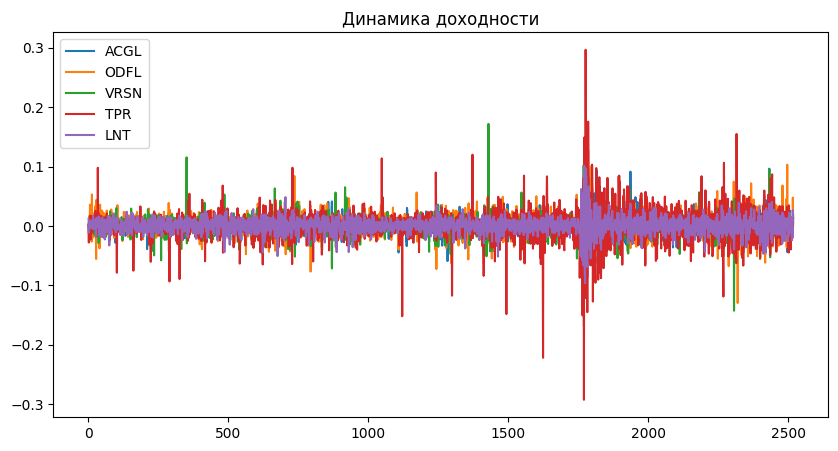

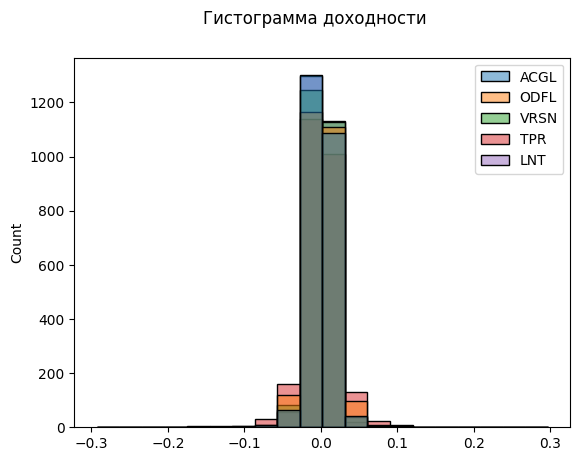

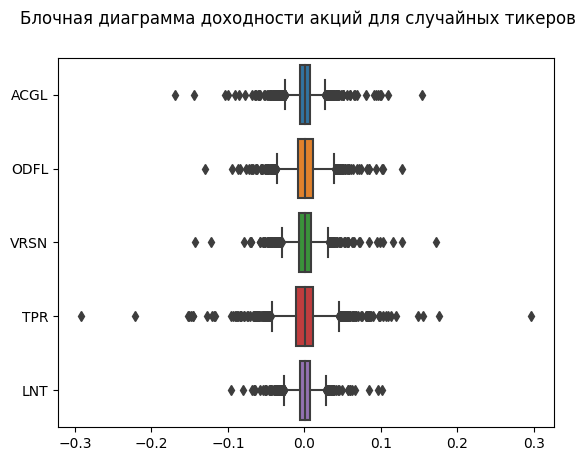

In [14]:
import random
tickers = random.sample(list(df_r.columns), 5)

df_r[tickers].plot(figsize=(10,5), title='Динамика доходности')
plt.show()

sns.histplot(df_r[tickers].dropna(), kde=False, bins=20)
plt.suptitle('Гистограмма доходности')
plt.show()

sns.boxplot(data=df_r[tickers].dropna(), orient='h')
plt.suptitle('Блочная диаграмма доходности акций для случайных тикеров')
plt.show()

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону.

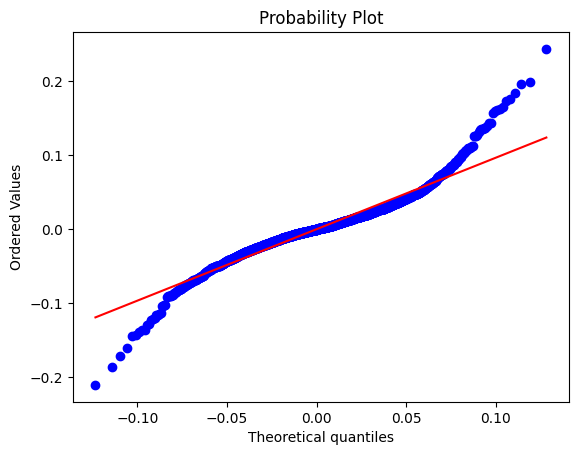

In [15]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);



**ё) [10 баллов]** Без буквы ё никуда, скажут нам Пафнутий Чебышёв и Лёв Толстой.

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.


In [16]:

extracted_col = df_prices['Date']
df_r.insert(0, "Dates", extracted_col)
df_r.set_index('Dates')

df_train = df_r[df_r['Dates']  < "2022-03-03"]
df_test = df_r[df_r['Dates']  >= '2022-03-03']



**Все расчёты ниже делайте по обучающей выборке.**

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте .mean() за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных. Есть ли среди самых доходных компаний Тесла? :)


In [17]:
R = df_train.mean(numeric_only=True)

sorted_df = R.sort_values(ascending=False)
top_10 = sorted_df.head(10)
botton_10 = sorted_df.tail(10)
print(f'10 самых доходных компаний\n {top_10}\n' )
print(f'10 самых убыточных компаний\n {botton_10}')
tesla = "TSLA"
print(f'Есть ли среди самых доходных компаний Тесла? {tesla in top_10.index}')

10 самых доходных компаний
 CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

10 самых убыточных компаний
 WBD     0.000149
BEN     0.000105
SLB     0.000087
KMI     0.000071
LUMN    0.000060
IBM     0.000060
GE      0.000021
KHC    -0.000037
VTRS   -0.000168
RIVN   -0.005722
dtype: float64
Есть ли среди самых доходных компаний Тесла? True


Один из способов измерить, насколько ценная бумага рискованная - использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. Есть ли среди самых рискованных компаний Тесла? :)

In [18]:
STD = df_train.std(numeric_only=True)
sorted_std = STD.sort_values(ascending=False)
top_std = sorted_df.head(10)
botton_std = sorted_df.tail(10)
print(f'10 самых рискованных компаний\n {botton_std}\n')
print(f'10 самых безрисковых компаний\n {top_std}')
print(f'Есть ли среди самых доходных компаний Тесла? {tesla in top_std.index}')

10 самых рискованных компаний
 WBD     0.000149
BEN     0.000105
SLB     0.000087
KMI     0.000071
LUMN    0.000060
IBM     0.000060
GE      0.000021
KHC    -0.000037
VTRS   -0.000168
RIVN   -0.005722
dtype: float64

10 самых безрисковых компаний
 CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64
Есть ли среди самых доходных компаний Тесла? True


Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу df_result. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [19]:
df_result = pd.DataFrame({"std" : STD, "r" : R })
df_result = df_result.reset_index()
df_result.rename(columns = {'index':'Ticers'}, inplace = True)
print(df_result.shape)
print(df_result.columns)
df_result.head()

(520, 3)
Index(['Ticers', 'std', 'r'], dtype='object')


,Ticers,std,r
0,A,0.015556,0.000808
1,AAL,0.031476,0.000579
2,AAP,0.020050,0.000659
3,AAPL,0.017579,0.001268
4,ABBV,0.017331,0.000925




Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше?

Ответ: PSG


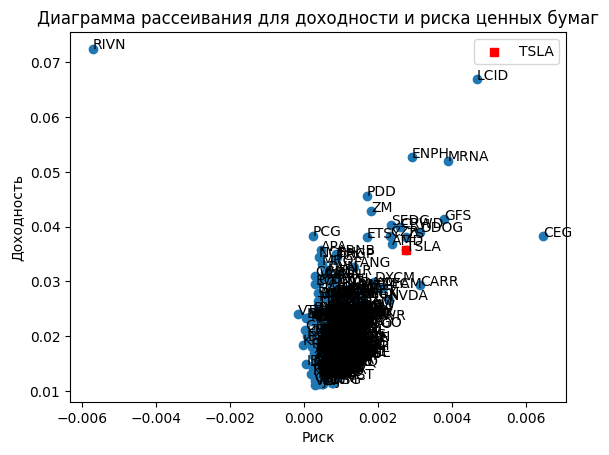

In [20]:
plt.scatter(df_result['r'], df_result['std'])
df_result.apply(lambda row: plt.annotate(row['Ticers'], (row['r'], row['std'])), axis=1)

tesla = df_result[df_result['Ticers'] == 'TSLA']
plt.scatter(tesla['r'], tesla['std'], color='red', marker='s', label='TSLA')

plt.title('Диаграмма рассеивания для доходности и риска ценных бумаг')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.legend()
plt.show()




Чем больше риск, тем выше потенциально может оказаться доходноcть. **Но при этом мы с более высокой вероятностью можем уйти в убыток.**

**ж) [5 баллов]** Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают **VaR**.

**Value-at-Risk** — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается VaR
. Еще его часто называют статистика **16:15**, такое название он получил потому, что **16:15** – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

**Value-at-Risk** на каком-либо уровне (скажем, **5%**
) – это просто квантиль уровня **5%**. То есть это такая доходность, что в **95%** случаев у нас дела будут лучше.

Посчитайте **5% VaR** по всем ценным бумагам. Для этого используйте метод quantile(). Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите VaR в табличку df_result отдельной колонкой (нужно сделать join). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.

In [21]:
var_df = df_result.groupby('Ticers')['std'].quantile(0.05).to_frame().reset_index()
var_df.columns = ['Ticers', 'VaR']

top_risk = var_df.nlargest(10, 'VaR')
bottom_risk = var_df.nsmallest(10, 'VaR')

df_result = df_result.merge(var_df, on='Ticers')
df_result['VaR'] = df_result['VaR'] * -1
df_result.head()
print(f'10 самых рисковых компаний\n {top_risk}\n' )
print(f'10 наименее рисковых компаний\n {bottom_risk}')

10 самых рисковых компаний
     Ticers       VaR
405   RIVN  0.072406
275   LCID  0.066841
162   ENPH  0.052601
322   MRNA  0.052030
370    PDD  0.045639
517     ZM  0.042788
202    GFS  0.041315
419   SEDG  0.040310
116   CRWD  0.039878
131   DDOG  0.039034

10 наименее рисковых компаний
     Ticers       VaR
489     VZ  0.011099
259    JNJ  0.011255
272     KO  0.011309
376     PG  0.011339
413    RSG  0.011408
500     WM  0.011432
373    PEP  0.011443
97      CL  0.011778
313    MMC  0.012117
110   COST  0.012303


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте VaR.

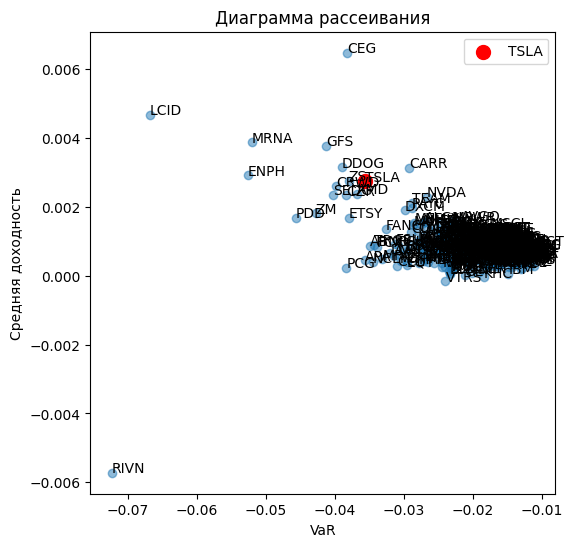

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_result['VaR'], df_result['r'], alpha=0.5)
df_result.apply(lambda row: plt.annotate(row['Ticers'], (row['VaR'], row['r'])), axis=1)

tsla = df_result[df_result['Ticers'] == 'TSLA']
ax.scatter(tsla['VaR'], tsla['r'], color='red', s=100, label='TSLA')

ax.set_xlabel('VaR')
ax.set_ylabel('Средняя доходность')
ax.set_title('Диаграмма рассеивания')
ax.legend()
plt.show()


**VaR** хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но **VaR** - это лучшее из **5%** худших случаев. А что лежит в тех **5%** худших случаев?…

**Expected shortfall** - это среднее значение по всем тем точкам, что оказались хуже VaR, То есть среднее по худшим 5%. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих 5% случаев.

* Рассчитаете **ES** для Теслы

* Предположим, что мы вложили в Теслу **1000** долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой **1000** долларов к концу дня?

* Посчитайте, сколько денег мы заработаем в **5%** лучших случаев к концу дня?

**Важно: VaR** и **ES** в этом пункте - отрицательные числа.

In [23]:
ser_tsla = df_train['TSLA']
var_95 = ser_tsla.quantile(0.05)

es_tsla = -ser_tsla[ser_tsla < -var_95].mean()

mean_value = ser_tsla.mean()
tesla_daily_returns = ser_tsla.pct_change()
tesla_daily_returns = tesla_daily_returns.replace([np.inf, -np.inf], mean_value)
var = -1 * tesla_daily_returns.quantile(0.05)

expected_shortfall = -1 * tesla_daily_returns[tesla_daily_returns < var].mean()
loss = expected_shortfall * 1000

best_cases = tesla_daily_returns[tesla_daily_returns > tesla_daily_returns.quantile(0.95)]
profit = best_cases.mean() * 1000

print(f'ES for TSLA: {es_tsla}')
print(f'Ожидаемая потеря от вложения 1000 долларов в Теслу: {loss:.2f} долларов')
print(f'Прибыль от вложения 1000 долларов в 5% лучших случаев: {profit:.10f} долларов')


ES for TSLA: 0.002728267245579222
Ожидаемая потеря от вложения 1000 долларов в Теслу: 3025.89 долларов
Прибыль от вложения 1000 долларов в 5% лучших случаев: 32010.7599985204 долларов


In [24]:
alpha = 0.05

sorted_prices = df_prices.apply(lambda x: np.sort(x))
VaR = sorted_prices.apply(lambda x: x[int(len(x)*alpha)])
losses = sorted_prices.apply(lambda x: x[x < VaR[x.name]])

ES = -losses.mean(numeric_only = True)
df_es = pd.DataFrame({'ES' : ES})
df_result.set_index('Ticers', inplace=True)
df_result = df_result.join(df_es)
df_result.head()

,std,r,VaR,ES
Ticers,,,,
A,0.015556,0.000808,-0.015556,-29.028054
AAL,0.031476,0.000579,-0.031476,-11.434597
AAP,0.020050,0.000659,-0.020050,-75.510731
AAPL,0.017579,0.001268,-0.017579,-13.596288
ABBV,0.017331,0.000925,-0.017331,-28.822609


In [25]:
df_result = df_result.reset_index()
df_result = df_result.round(3)  
df_result = df_result.rename(columns={'Ticers': 'Ticker'})
df_result = df_result.sort_values('ES', ascending=False)
df_result.to_csv('var_result.csv', index=False)
df_result.head()

,Ticker,std,r,VaR,ES
162,ENPH,0.053,0.003,-0.053,-0.918
30,AMD,0.037,0.002,-0.037,-1.928
423,SIRI,0.016,0.000,-0.016,-2.882
348,NVDA,0.027,0.002,-0.027,-3.236
197,FTNT,0.023,0.001,-0.023,-3.724



## 1.3 VaR-кривая

**з) [10 баллов]** Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.


In [26]:
df_train.set_index('Dates')
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285